# Applied Data Science Capstone

### This project is done by @Bagaber as an assignment for "IBM Data Science Professional Certificate"

#### 1.  description of the problem and a discussion of the background.
Our stakeholders (restaurant-chains owner) want us to make a data-driven decision about which is the best neighbor in London to open an Asian Restaurant.

#### 2. description of the data and how it will be used to solve the problem.
2.1	We will use the data available in London Datastore (free data-sharing portal) in order to decide which borough we will have our Asian restaurant (https://data.london.gov.uk/ )

2.1.1	This data will help us t is the most populated considering the targeted ethnic group that is interested in our restaurant.  Moreover I will considered the population projection till 2030 in order to make sure the business is profitable for the coming 10 years. 
 https://data.london.gov.uk/dataset/ethnic-group-population-projections 

2.1.2.	Another data that will help us is the weekly earning per year in each borough https://data.london.gov.uk/dataset/earnings-place-residence-borough

2.2	We will use foursquare to check the neighborhoods of the chosen borough.  Which locations has the most visited restaurants?  Which location is populated by Asian..etc.


#### 3. Methodology section  where you discuss and describe any exploratory data analysis that you did

As you will see in the notebook:

3.1	To work on the solution, I have used Pandas library to read above data in XLS format and convert them into pandas dataframes. I’ve done extensive data cleaning to present the data in suitable format, exploration analysis is done as well (line chart)

3.2	I got the geolocations of borough & neighborhood from Wikipedia.  3 libraries have been used to get the coordinates from the URLs (requests, urllib and BeautifulSoup
 https://en.wikipedia.org/wiki/List_of_London_boroughs
https://en.wikipedia.org/wiki/List_of_areas_of_London

3.3	Folium library is used to visualize the neighborhoods.

3.4	I used Foursquare API to explore the neighborhoods in London city. Venues, the venues’ categories, working hours ..etc are taken from Foursquare.

3.5	I’ve clustered the neighborhoods using K-means Clustering algorithm. 


# Let's start  analysis:

In [304]:
#importing the libraries
#belwo code will be hidden by IBM since it containts my IDBM DB credintials

In [101]:
# The code was removed by Watson Studio for sharing.

belwo code will be hidden by IBM since it containts my IDBM DB credintials
it will read the data of below link
https://data.london.gov.uk/download/ethnic-group-population-projections/a9598ef0-808c-4f96-9eac-8bb314bd92cd/Ethnic%20group%20projections%20%282016-based%20central%20trend%29.xlsx

In [302]:
# The code was removed by Watson Studio for sharing.

let's take a look to the shape of this databse

In [64]:
db1.shape

(57684, 45)

columns of this database

In [66]:
db1.columns

Index([    'gss_code',      'borough',          'sex',          'age',
       'ethnic_group',           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019,           2020,           2021,
                 2022,           2023,           2024,           2025,
                 2026,           2027,           2028,           2029,
                 2030,           2031,           2032,           2033,
                 2034,           2035,           2036,           2037,
                 2038,           2039,           2040,           2041,
                 2042,           2043,           2044,           2045,
                 2046,           2047,           2048,           2049,
                 2050],
      dtype='object')

so it contains the projection of the pupulation of each ethinic group in each borough till 2050

### we will consider the average till 2030 only to make sure that the businness if feasible for the coming 10 years.  

In [69]:
db2=db1[['gss_code','borough','ethnic_group',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030]]


In [70]:
db2.set_index(['gss_code'])
db3=db2.groupby(['gss_code','borough', 'ethnic_group'],as_index=False).mean()

let's check the ethnic_group that we have

In [72]:
db3['ethnic_group'].unique()

array(['All persons', 'Arab', 'BAME', 'Bangladeshi', 'Black African',
       'Black Caribbean', 'Chinese', 'Indian', 'Other Asian',
       'Other Black', 'Other Ethnic Group', 'Other Mixed', 'Other White',
       'Pakistani', 'White & Asian', 'White & Black African',
       'White & Black Caribbean', 'White British', 'White Irish'],
      dtype=object)

### for our asian restaurant we are intersted in below 5 grupos only , & we will drop remaining 

In [74]:
db3.drop(db3[(db3.ethnic_group != 'Bangladeshi') & (db3.ethnic_group != 'Chinese') & (db3.ethnic_group != 'Pakistani') & (db3.ethnic_group != 'Indian') & (db3.ethnic_group != 'Other Asian')].index, inplace=True)


In [76]:
db3['ethnic_group'].unique()

array(['Bangladeshi', 'Chinese', 'Indian', 'Other Asian', 'Pakistani'],
      dtype=object)

In [305]:
since the DF has our targeted group we will group by borough 

SyntaxError: invalid syntax (<ipython-input-305-84b5d3e6a62b>, line 1)

In [90]:
db4=db3.groupby(['gss_code','borough'],as_index=False).mean()

explore & clean the data

In [91]:
db4.head()

,gss_code,borough,2011,2012,2013,2014,2015,2016,2017,2018,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,E09000001,City of London,4.084783,3.934783,3.636957,3.628261,3.906522,4.089130,4.117391,4.119565,...,4.195652,4.223913,4.256522,4.256522,4.300000,4.330435,4.363043,4.382609,4.391304,4.419565
1,E09000002,Barking and Dagenham,129.828261,140.569565,151.145652,162.476087,173.163043,184.623913,194.300000,203.647826,...,229.578261,237.586957,245.252174,252.613043,259.656522,266.450000,272.986957,279.276087,285.304348,291.132609
2,E09000003,Barnet,287.563043,296.791304,304.719565,313.991304,322.710870,332.478261,340.643478,348.604348,...,371.530435,378.691304,385.647826,392.313043,398.789130,405.034783,411.113043,417.043478,422.793478,428.373913
3,E09000004,Bexley,66.578261,69.508696,72.689130,76.221739,79.486957,82.839130,85.686957,88.493478,...,96.389130,98.876087,101.297826,103.667391,106.015217,108.306522,110.519565,112.730435,114.950000,117.089130
4,E09000005,Brent,463.413043,467.317391,471.971739,479.328261,486.656522,495.593478,502.615217,509.500000,...,529.619565,536.019565,542.239130,548.223913,554.026087,559.632609,565.013043,570.284783,575.408696,580.417391


In [92]:
db4.columns = list(map(str, db4.columns))

initiate a colummn for the average:

In [93]:
db4['avg']= db4.mean(axis=1)

In [94]:
db4.head()

,gss_code,borough,2011,2012,2013,2014,2015,2016,2017,2018,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,avg
0,E09000001,City of London,4.084783,3.934783,3.636957,3.628261,3.906522,4.089130,4.117391,4.119565,...,4.223913,4.256522,4.256522,4.300000,4.330435,4.363043,4.382609,4.391304,4.419565,4.147500
1,E09000002,Barking and Dagenham,129.828261,140.569565,151.145652,162.476087,173.163043,184.623913,194.300000,203.647826,...,237.586957,245.252174,252.613043,259.656522,266.450000,272.986957,279.276087,285.304348,291.132609,219.672826
2,E09000003,Barnet,287.563043,296.791304,304.719565,313.991304,322.710870,332.478261,340.643478,348.604348,...,378.691304,385.647826,392.313043,398.789130,405.034783,411.113043,417.043478,422.793478,428.373913,363.966522
3,E09000004,Bexley,66.578261,69.508696,72.689130,76.221739,79.486957,82.839130,85.686957,88.493478,...,98.876087,101.297826,103.667391,106.015217,108.306522,110.519565,112.730435,114.950000,117.089130,93.817826
4,E09000005,Brent,463.413043,467.317391,471.971739,479.328261,486.656522,495.593478,502.615217,509.500000,...,536.019565,542.239130,548.223913,554.026087,559.632609,565.013043,570.284783,575.408696,580.417391,523.833478


let's drop the years since we have created the average column & sort by the highest borough

In [87]:
db4.drop(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028','2029', '2030' ], axis=1, inplace=True)


In [88]:
db4.sort_values(by='avg', ascending=False, axis=0, inplace=True)

In [89]:
db4.head()

,gss_code,borough,avg
24,E09000025,Newham,742.264891
25,E09000026,Redbridge,693.642391
29,E09000030,Tower Hamlets,558.881304
14,E09000015,Harrow,532.936630
4,E09000005,Brent,523.833478


## as a result of above analysis ,  Newham borough has highest asian population, we will consider the earnings data of only this borough

Let's create a DF for our chosen borough:

In [113]:
NewHam_population=db3.groupby(['gss_code','borough'],as_index=False).mean()
NewHam_population=NewHam_population.loc[NewHam_population['borough'] == 'Newham']
NewHam_population

,gss_code,borough,2011,2012,2013,2014,2015,2016,2017,2018,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
24,E09000025,Newham,589.773913,605.806522,620.723913,639.871739,662.591304,684.995652,701.397826,717.102174,...,760.384783,773.658696,786.417391,798.678261,810.430435,821.763043,832.730435,843.293478,853.526087,863.38913


### using the data the "Weekly Earnings since 2003 till 2019  in each borough

information imported below excel file
from https://data.london.gov.uk/download/earnings-place-residence-borough/1686ef1c-b169-442d-8877-e7e49788f668/earnings-residence-borough.xlsx

 excprot code was removed by Watson Studio for sharing.


In [307]:
# The code was removed by Watson Studio for sharing.

In [102]:
earning = pd.read_excel(body)
earning.head()

,Code,Area,2003 Pay (£),2004 Pay (£),2005 Pay (£),2006 Pay (£),2007 Pay (£),2008 Pay (£),2009 Pay (£),2010 Pay (£),2011 Pay (£),2012 Pay (£),2013 Pay (£),2014 Pay (£),2015 Pay (£),2016 Pay (£),2017 Pay (£),2018 Pay (£),2019 Pay (£)
0,00AB,Barking and Dagenham,354.9,360.1,375.1,417.6,446.7,449.9,448.8,429.3,452.1,450.0,441.2,422.5,436.6,462.2,461.0,479.1,472.9
1,00AC,Barnet,450.1,453.3,442.3,466.1,460.0,502.2,528.1,501.6,498.3,503.1,517.5,479.1,491.0,485.6,522.6,536.6,536.6
2,00AD,Bexley,431.9,438.1,452.4,443.4,469.8,483.9,486.3,518.1,505.1,509.1,497.9,512.6,491.1,487.0,513.0,513.8,550.2
3,00AE,Brent,359.8,395.5,394.7,398.7,421.6,437.0,439.1,423.1,414.9,442.0,441.8,441.8,457.6,467.0,471.0,480.0,524.6
4,00AF,Bromley,449.2,461.2,464.8,479.5,506.3,546.0,545.6,527.2,551.7,566.6,581.1,578.5,583.8,584.3,608.0,632.5,641.3


In [105]:
earning.shape

(32, 19)

In [108]:
earning=earning.set_index(['Code'])

let's focus on Newham which what we decided in the prevoius section based on the ethnic population:

In [115]:
NewHam_earning=earning.loc[earning['Area'] == 'Newham']
NewHam_earning

,Area,2003 Pay (£),2004 Pay (£),2005 Pay (£),2006 Pay (£),2007 Pay (£),2008 Pay (£),2009 Pay (£),2010 Pay (£),2011 Pay (£),2012 Pay (£),2013 Pay (£),2014 Pay (£),2015 Pay (£),2016 Pay (£),2017 Pay (£),2018 Pay (£),2019 Pay (£)
Code,,,,,,,,,,,,,,,,,,
00BB,Newham,343.4,371.0,383.2,390.9,390.8,403.0,421.6,422.4,382.5,369.8,387.6,393.7,421.6,436.7,471.3,479.1,517.1


Earnings DataFrame


### Data Explatory
transpose it for the sake for data Explatory

In [198]:
new_earning= NewHam_earning.T.reset_index()
new_earning.head()

Code,index,00BB
0,Area,Newham
1,2003 Pay (£),343.4
2,2004 Pay (£),371
3,2005 Pay (£),383.2
4,2006 Pay (£),390.9


In [199]:
new_earning.rename(columns={'index':'Year', '00BB':'Earnings'},inplace=True)
new_earning = new_earning.drop([0]).reset_index(drop=True)
new_earning

Code,Year,Earnings
0,2003 Pay (£),343.4
1,2004 Pay (£),371
2,2005 Pay (£),383.2
3,2006 Pay (£),390.9
4,2007 Pay (£),390.8
5,2008 Pay (£),403
6,2009 Pay (£),421.6
7,2010 Pay (£),422.4
8,2011 Pay (£),382.5
9,2012 Pay (£),369.8


import visualization libraries 

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [200]:
new_earning.Year=['2003', '2004','2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [201]:
new_earnings = new_earning.apply(pd.to_numeric, errors='coerce')
new_earnings.head()


Code,Year,Earnings
0,2003,343.4
1,2004,371.0
2,2005,383.2
3,2006,390.9
4,2007,390.8


In [203]:
new_earnings.columns

Index(['Year', 'Earnings'], dtype='object', name='Code')

In [204]:
new_earnings.set_index('Year', inplace=True)


Line plot for weekly earning per year

<function matplotlib.pyplot.show(*args, **kw)>

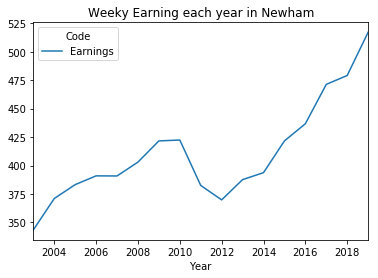

In [205]:
new_earnings.plot()
plt.title("Weeky Earning each year in Newham")

plt.show

# Segmenting / Clustering Neighborhoods of London

will start by importing the required libraries

In [207]:
! pip install beautifulsoup4
! pip install lxml
! pip install requestsimport requests 
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
import random # library for random number generation
!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

  ERROR: Could not find a version that satisfies the requirement requestsimport (from versions: none)
ERROR: No matching distribution found for requestsimport
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                           

#### we will use beautifulsoup in order to exctract the coordinates of each boroughs from a wikipedia table

In [211]:
import requests
Wiki = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(Wiki).text
extracted = BeautifulSoup(res,'lxml')

df1 = []
for items in extracted.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data1 = data[0]
    data8 = data[8]    
    try:
        borough_name = data1.get_text()
        borough_name = borough_name.split('[')
        borough_name = borough_name[0]
        borough_name = borough_name.strip()
        
        ll = data8.get_text()
        ll = ll.split('/')
        lat_long = ll[2]
        lat_long = lat_long.split('(')
        lat_long = lat_long[0]
        lat_long = lat_long.split(';')
        latitude = lat_long[0]
        latitude = latitude.strip()
        longitude = lat_long[1]
        longitude = longitude.strip()
        longitude = longitude.replace(u'\ufeff', '')
        latitude = float(latitude)
        longitude = float(longitude)

#       Append "borough_name, long. , lat." to a list
        df1.append((borough_name, latitude, longitude))
    except IndexError:pass

create DF for the bourough & will name the columns (DF2)

In [212]:
df2 = pd.DataFrame(df1, columns=['Borough', 'Latitude' , 'Longitude'])

In [213]:
df2.shape

(32, 3)

In [214]:
df2.head()


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


Since we picked Newham in above sections , let's slice the DF to make it for Newham only

In [215]:
df2.loc[df2['Borough'] == 'Newham']

,Borough,Latitude,Longitude
23,Newham,51.5077,0.0469


now will get the coordinates of london using geopy

In [216]:
address = 'London, UK'
geo_locator = Nominatim()
location = geo_locator.geocode(address)
latitude = location.latitude
longitude = location.longitude

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


In [217]:
print (latitude , longitude)

51.5073219 -0.1276474


will create a map of London with its Boroughs superimposed on top of it , along with makers

In [218]:
map_of_dondon = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough in zip(df2['Latitude'], df2['Longitude'], df2['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
fill_opacity=0.7).add_to(map_of_dondon)  
map_of_dondon

### As the borough Newham is having high asian population, we will consider to Segment and Cluster only the neighbourhoods of this borough. 
let's start by taking coordinates of of Newham borough (area),
we will use the same methodolody (beautiful soup to get it from wikipedia)

In [219]:
Wiki2 = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
res = requests.get(Wiki2).text
soup = BeautifulSoup(res,'lxml')

codes = []
areas_list = []
href_links_list = []
for items in soup.find('table', class_= 'wikitable sortable').find_all('tr')[1::]:
    data = items.find_all(['td'])
    data0 = data[0]
    area_name = data0.text

    data1 = data[1]
    data1 = data1.text
    borough = data1.split('[')
    borough_name = borough[0]
    data5 = data[5]
    code = data5.text
    code = code.strip()
    
    if borough_name == 'Newham':
        codes.append(code)
        areas_list.append((borough_name,area_name,code))

                
for link in soup.findAll('a', attrs={'href': re.compile("^https://tools.wmflabs.org")}):
            htext = link.text
            if htext in codes:
                hlink = link.get('href')
                href_links_list.append((htext, hlink))

now we have list of areas & codes , will store it in DF3

In [220]:
df3 = pd.DataFrame(areas_list, columns=['Borough', 'Area', 'Code'])
df3.head()


,Borough,Area,Code
0,Newham,Beckton,TQ435815
1,Newham,Canning Town,TQ405815
2,Newham,Custom House,TQ408807
3,Newham,East Ham,TQ425835
4,Newham,Forest Gate,TQ405855


In [221]:
df3.columns

Index(['Borough', 'Area', 'Code'], dtype='object')

In [222]:
df3.shape


(14, 3)

We will create a seperate dataframe for the list of href links (DF4)

In [223]:
df4 = pd.DataFrame(href_links_list, columns=['Code','href'])
df4.columns

Index(['Code', 'href'], dtype='object')

In [224]:
df4.shape 


(15, 2)

In [225]:
df4

,Code,href
0,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


merge  Areas and href Links DFs as a new datafram (DF5)

In [226]:
colm = df4.columns.difference(df3.columns)
colm


Index(['href'], dtype='object')

In [227]:
df5 = pd.concat([df3, df4[colm]], axis=1)


In [228]:
df5.shape


(15, 4)

In [229]:
df5

,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


Cleaning the data

In [230]:
df5 = df5.dropna(how='any')
df5

,Borough,Area,Code,href
0,Newham,Beckton,TQ435815,https://tools.wmflabs.org/geohack/en/51.514205...
1,Newham,Canning Town,TQ405815,https://tools.wmflabs.org/geohack/en/51.514959...
2,Newham,Custom House,TQ408807,https://tools.wmflabs.org/geohack/en/51.507695...
3,Newham,East Ham,TQ425835,https://tools.wmflabs.org/geohack/en/51.532429...
4,Newham,Forest Gate,TQ405855,https://tools.wmflabs.org/geohack/en/51.550902...
5,Newham,Little Ilford,TQ435855,https://tools.wmflabs.org/geohack/en/51.550147...
6,Newham,Manor Park,TQ425855,https://tools.wmflabs.org/geohack/en/51.550401...
7,Newham,Maryland,TQ391849,https://tools.wmflabs.org/geohack/en/51.545857...
8,Newham,North Woolwich,TQ435795,https://tools.wmflabs.org/geohack/en/51.496234...
9,Newham,Plaistow,TQ405825,https://tools.wmflabs.org/geohack/en/51.523944...


Get the geo co-ordinates for all the areas in  Newham

In [231]:
geo_codes = []
for row in df5.itertuples():
    url = row.href
    code = row.Code
    res = requests.get(url).text
    soup1 = BeautifulSoup(res,'lxml')
    
    for lat in soup1.find('span',{'class':'latitude'}):
        latitude = lat
        latitude = float(latitude)
            
    for long in soup1.find('span',{'class':'longitude'}):    
        longitude = long
        longitude = float(longitude)
        
    geo_codes.append((code, latitude, longitude))

print(geo_codes)

[('TQ435815', 51.514206, 0.066634), ('TQ405815', 51.514959, 0.023429), ('TQ408807', 51.507696, 0.027431), ('TQ425835', 51.53243, 0.053041), ('TQ405855', 51.550902, 0.025024), ('TQ435855', 51.550148, 0.068263), ('TQ425855', 51.550401, 0.05385), ('TQ391849', 51.545857, 0.004608), ('TQ435795', 51.496234, 0.065821), ('TQ405825', 51.523945, 0.023828), ('TQ415795', 51.496738, 0.037029), ('TQ385845', 51.54241, -0.004196), ('TQ405837', 51.534728, 0.024306), ('TQ405837', 51.534728, 0.024306)]


convert above to a dataframe (df6)

In [232]:
df6 = pd.DataFrame(geo_codes, columns=['Code','Latitude','Longitude'])
df6

,Code,Latitude,Longitude
0,TQ435815,51.514206,0.066634
1,TQ405815,51.514959,0.023429
2,TQ408807,51.507696,0.027431
3,TQ425835,51.532430,0.053041
4,TQ405855,51.550902,0.025024
5,TQ435855,51.550148,0.068263
6,TQ425855,51.550401,0.053850
7,TQ391849,51.545857,0.004608
8,TQ435795,51.496234,0.065821
9,TQ405825,51.523945,0.023828


merge the Neighborhoods and Geocodes DFs (df7)

In [233]:
df3.columns


Index(['Borough', 'Area', 'Code'], dtype='object')

In [234]:
df3.shape


(14, 3)

In [235]:
df6.columns


Index(['Code', 'Latitude', 'Longitude'], dtype='object')

In [236]:
colm = df6.columns.difference(df3.columns)
colm

Index(['Latitude', 'Longitude'], dtype='object')

In [237]:
df7 = pd.concat([df3, df6[colm]], axis=1)

df7

,Borough,Area,Code,Latitude,Longitude
0,Newham,Beckton,TQ435815,51.514206,0.066634
1,Newham,Canning Town,TQ405815,51.514959,0.023429
2,Newham,Custom House,TQ408807,51.507696,0.027431
3,Newham,East Ham,TQ425835,51.532430,0.053041
4,Newham,Forest Gate,TQ405855,51.550902,0.025024
5,Newham,Little Ilford,TQ435855,51.550148,0.068263
6,Newham,Manor Park,TQ425855,51.550401,0.053850
7,Newham,Maryland,TQ391849,51.545857,0.004608
8,Newham,North Woolwich,TQ435795,51.496234,0.065821
9,Newham,Plaistow,TQ405825,51.523945,0.023828


Clean the data

In [238]:
df7 = df7.rename(columns={'Area' :'Neighborhood'})


In [239]:
df7.drop(['Code'], axis=1, inplace=True)
df7

,Borough,Neighborhood,Latitude,Longitude
0,Newham,Beckton,51.514206,0.066634
1,Newham,Canning Town,51.514959,0.023429
2,Newham,Custom House,51.507696,0.027431
3,Newham,East Ham,51.532430,0.053041
4,Newham,Forest Gate,51.550902,0.025024
5,Newham,Little Ilford,51.550148,0.068263
6,Newham,Manor Park,51.550401,0.053850
7,Newham,Maryland,51.545857,0.004608
8,Newham,North Woolwich,51.496234,0.065821
9,Newham,Plaistow,51.523945,0.023828


Now lets get the Coordinates of Newham

In [240]:
address = 'Newham, London'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


In [241]:
print (latitude, longitude)

51.52999955 0.02931796029382208


Let's Visualize the Neighborhoods by creating the map & adding markers on top of them

In [242]:
Newham = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df7['Latitude'], df7['Longitude'], df7['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Newham)  
    
Newham

# Using Foursquare

### Let's Visualize the Neighborhoods of Newham Borough

check our final DF

In [246]:
df7.shape

(14, 4)

In [247]:
df7.columns

Index(['Borough', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')

In [248]:
df7.loc[0, 'Neighborhood']

'Beckton'

In [249]:
df7.loc[0]

Borough           Newham
Neighborhood     Beckton
Latitude         51.5142
Longitude       0.066634
Name: 0, dtype: object

In [250]:
#Get the Neighborhood's latitude and longitude value

In [253]:
n_latitude = df7.loc[0, 'Latitude']
n_longitude = df7.loc[0, 'Longitude']

print(n_latitude,n_longitude)

51.514206 0.066634


### Now get the top 100 places of Newham Neighborhood within 500KM radius

Create the GET request URL

In [298]:
#belwo code will be hidden by IBM since it containts my foursquare credintials

In [297]:
# The code was removed by Watson Studio for sharing.

In [255]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret=\
       {}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    n_latitude, 
    n_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=AOB4TEHMBBJTVU1LLN4IJLQEUL2EYG3LIXJYAQEAVCJCH5WA&client_secret=       JLN12OF3RLK1QIICATFYPQW5AZRMMUUXBMJMPZ5XEE1CYAQH&v=20180604&ll=51.514206,0.066634&radius=500&limit=100'

save it to json

In [256]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eab1830e826ac2d0d3a2227'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Beckton',
  'headerFullLocation': 'Beckton, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': 51.518706004500004,
    'lng': 0.07385150597103936},
   'sw': {'lat': 51.5097059955, 'lng': 0.05941649402896063}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e0c524018a89ad010688d2b',
       'name': 'East london Gymnastics Club',
       'location': {'lat': 51.514106774737556,
        'lng': 0.060155068624099396,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.514106774737556,
          'lng'

Extract the Categories of the Venues

In [257]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### let's start cleaning the json and structure it into a df

In [258]:
results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
nearby = json_normalize(venues) # flatten JSON

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby =nearby.loc[:, filtered_columns]

nearby['venue.categories'] = nearby.apply(get_category_type, axis=1)

nearby.columns = [col.split(".")[-1] for col in nearby.columns]
nearby.head()

,name,categories,lat,lng
0,East london Gymnastics Club,Gym / Fitness Center,51.514107,0.060155
1,Home Bargains,Discount Store,51.516805,0.062804
2,Lituanica,Grocery Store,51.516442,0.062927
3,Premier Inn London Beckton,Hotel,51.515115,0.061016
4,Matalan,Clothing Store,51.516004,0.062635


check the DF (nearby)

In [259]:
nearby

,name,categories,lat,lng
0,East london Gymnastics Club,Gym / Fitness Center,51.514107,0.060155
1,Home Bargains,Discount Store,51.516805,0.062804
2,Lituanica,Grocery Store,51.516442,0.062927
3,Premier Inn London Beckton,Hotel,51.515115,0.061016
4,Matalan,Clothing Store,51.516004,0.062635
5,Beckton DLR Station,Light Rail Station,51.514365,0.061460
6,Dreams,Furniture / Home Store,51.516367,0.062710
7,Brewers Fayre,Pub,51.514812,0.060861
8,Beckton Retail Park,Shopping Plaza,51.517122,0.062234


In [260]:
nearby.shape

(9, 4)

In [261]:
nearby['name'].value_counts()

Beckton Retail Park            1
East london Gymnastics Club    1
Brewers Fayre                  1
Premier Inn London Beckton     1
Matalan                        1
Dreams                         1
Home Bargains                  1
Beckton DLR Station            1
Lituanica                      1
Name: name, dtype: int64

In [262]:
nearby.shape[0]

9

# Exploring Neighborhoods in Newham

will start by creating  API request URL, make the GET request & return only relevant information for each nearby venue


In [265]:
def getNearby(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, 
            VERSION, lat, lng, radius, LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, lat, lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby)

In [267]:
Newham_venues = getNearby(names=df7['Neighborhood'],
                                   latitudes=df7['Latitude'],
                                   longitudes=df7['Longitude']
                                  )

#### Cleaning the data

In [268]:
Newham_venues.shape



(229, 7)

In [269]:
Newham_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beckton,51.514206,0.066634,East london Gymnastics Club,51.514107,0.060155,Gym / Fitness Center
1,Beckton,51.514206,0.066634,Home Bargains,51.516805,0.062804,Discount Store
2,Beckton,51.514206,0.066634,Lituanica,51.516442,0.062927,Grocery Store
3,Beckton,51.514206,0.066634,Premier Inn London Beckton,51.515115,0.061016,Hotel
4,Beckton,51.514206,0.066634,Matalan,51.516004,0.062635,Clothing Store


In [270]:
Newham_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beckton,9,9,9,9,9,9
Canning Town,4,4,4,4,4,4
Custom House,30,30,30,30,30,30
East Ham,15,15,15,15,15,15
Forest Gate,12,12,12,12,12,12
Little Ilford,4,4,4,4,4,4
Manor Park,4,4,4,4,4,4
Maryland,28,28,28,28,28,28
North Woolwich,22,22,22,22,22,22


In [271]:
len(Newham_venues['Venue Category'].unique())

102

# Analyze all Neighborhood in Newham

will start by creating one hot encoding, add neighborhood column back to dataframe & move neighborhood column to the first column


In [273]:
onehot = pd.get_dummies(Newham_venues[['Venue Category']], prefix="", prefix_sep="")
onehot['Neighborhood'] = Newham_venues['Neighborhood'] 
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighborhood,Accessories Store,African Restaurant,Art Gallery,Bakery,Bar,Boat or Ferry,Bookstore,Boutique,Brewery,...,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beckton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exploring the data

In [274]:
onehot.shape

(229, 103)

In [275]:
Newham_Neighbors = onehot.groupby('Neighborhood').mean().reset_index()
Newham_Neighbors.head()

,Neighborhood,Accessories Store,African Restaurant,Art Gallery,Bakery,Bar,Boat or Ferry,Bookstore,Boutique,Brewery,...,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,Beckton,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,Canning Town,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,Custom House,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.033333
3,East Ham,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.066667,0.0,0.0,0.066667,0.000000
4,Forest Gate,0.0,0.0,0.0,0.083333,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [276]:
Newham_Neighbors.columns

Index(['Neighborhood', 'Accessories Store', 'African Restaurant',
       'Art Gallery', 'Bakery', 'Bar', 'Boat or Ferry', 'Bookstore',
       'Boutique', 'Brewery',
       ...
       'Thai Restaurant', 'Theater', 'Toy / Game Store', 'Train Station',
       'Tunnel', 'Turkish Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Warehouse Store', 'Wine Bar'],
      dtype='object', length=103)

In [277]:
Newham_Neighbors.shape

(14, 103)

print all neighborhoods with the top 5 most common venues

In [278]:
top5 = 5
for hood in Newham_Neighbors['Neighborhood']:
    print("----"+hood+"----")
    temp = Newham_Neighbors[Newham_Neighbors['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top5))
    print('\n')

----Beckton----
                    venue  freq
0          Clothing Store  0.11
1  Furniture / Home Store  0.11
2          Discount Store  0.11
3          Shopping Plaza  0.11
4                   Hotel  0.11


----Canning Town----
               venue  freq
0               Park  0.25
1  Convenience Store  0.25
2        Gas Station  0.25
3               Café  0.25
4  Accessories Store  0.00


----Custom House----
                venue  freq
0               Hotel  0.13
1  Chinese Restaurant  0.10
2                 Pub  0.07
3                 Gym  0.07
4         Coffee Shop  0.07


----East Ham----
                 venue  freq
0    Electronics Store  0.07
1                  Pub  0.07
2          Coffee Shop  0.07
3       Clothing Store  0.07
4  Sporting Goods Shop  0.07


----Forest Gate----
               venue  freq
0      Grocery Store  0.25
1               Café  0.17
2      Train Station  0.08
3  Fish & Chips Shop  0.08
4             Market  0.08


----Little Ilford----
               

#### above into DF
Def to sort the venues in descending order

In [280]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## create  new df & display  top 10 venues for each neighborhood


In [282]:
top10 = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(top10):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
Sorted_neighborhoods = pd.DataFrame(columns=columns)
Sorted_neighborhoods['Neighborhood'] = Newham_Neighbors['Neighborhood']

for ind in np.arange(Newham_Neighbors.shape[0]):
    Sorted_neighborhoods.iloc[ind, 1:] = return_most_common_venues(Newham_Neighbors.iloc[ind, :], top10)

In [283]:
Sorted_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Furniture / Home Store,Pub,Clothing Store,Light Rail Station,Shopping Plaza,Discount Store,Grocery Store,Gym / Fitness Center,Fast Food Restaurant
1,Canning Town,Park,Convenience Store,Gas Station,Café,Wine Bar,Food Court,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
2,Custom House,Hotel,Chinese Restaurant,Pub,Coffee Shop,Gym,Wine Bar,Restaurant,Middle Eastern Restaurant,Light Rail Station,Italian Restaurant
3,East Ham,Gym Pool,Supermarket,Park,Coffee Shop,Clothing Store,Pub,Electronics Store,Fast Food Restaurant,Sandwich Place,Sporting Goods Shop
4,Forest Gate,Grocery Store,Café,Bakery,Train Station,Pub,Fast Food Restaurant,Fish & Chips Shop,Chinese Restaurant,Market,Wine Bar


# ClusterING the Neighborhoods


### Run K-means algorithm to cluster the neighborhood into 5

In [285]:
Newham_Neighbors.head()


,Neighborhood,Accessories Store,African Restaurant,Art Gallery,Bakery,Bar,Boat or Ferry,Bookstore,Boutique,Brewery,...,Thai Restaurant,Theater,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,Beckton,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,Canning Town,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,Custom House,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.033333
3,East Ham,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.066667,0.0,0.0,0.066667,0.000000
4,Forest Gate,0.0,0.0,0.0,0.083333,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [287]:
kclusters = 5
Newham_clustered = Newham_Neighbors.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Newham_clustered)
kmeans.labels_[0:10]

array([0, 4, 0, 0, 0, 3, 2, 0, 0, 0], dtype=int32)

In [288]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

#### create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood & merge Neighborhoods dataframe with Newham borough dataframe to add coordinates for each neighborhood


In [290]:
Newham_final = df7
Newham_final['Cluster Labels'] = kmeans.labels_

Newham_final = Newham_final.join(Sorted_neighborhoods.set_index('Neighborhood'), on='Neighborhood')

Newham_final.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Newham,Beckton,51.514206,0.066634,0,Hotel,Furniture / Home Store,Pub,Clothing Store,Light Rail Station,Shopping Plaza,Discount Store,Grocery Store,Gym / Fitness Center,Fast Food Restaurant
1,Newham,Canning Town,51.514959,0.023429,4,Park,Convenience Store,Gas Station,Café,Wine Bar,Food Court,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
2,Newham,Custom House,51.507696,0.027431,0,Hotel,Chinese Restaurant,Pub,Coffee Shop,Gym,Wine Bar,Restaurant,Middle Eastern Restaurant,Light Rail Station,Italian Restaurant
3,Newham,East Ham,51.532430,0.053041,0,Gym Pool,Supermarket,Park,Coffee Shop,Clothing Store,Pub,Electronics Store,Fast Food Restaurant,Sandwich Place,Sporting Goods Shop
4,Newham,Forest Gate,51.550902,0.025024,0,Grocery Store,Café,Bakery,Train Station,Pub,Fast Food Restaurant,Fish & Chips Shop,Chinese Restaurant,Market,Wine Bar


# Examine the Clusters

In [291]:
Newham_final.loc[Newham_final['Cluster Labels'] == 0, Newham_final.columns[[1] + list(range(5, Newham_final.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Furniture / Home Store,Pub,Clothing Store,Light Rail Station,Shopping Plaza,Discount Store,Grocery Store,Gym / Fitness Center,Fast Food Restaurant
2,Custom House,Hotel,Chinese Restaurant,Pub,Coffee Shop,Gym,Wine Bar,Restaurant,Middle Eastern Restaurant,Light Rail Station,Italian Restaurant
3,East Ham,Gym Pool,Supermarket,Park,Coffee Shop,Clothing Store,Pub,Electronics Store,Fast Food Restaurant,Sandwich Place,Sporting Goods Shop
4,Forest Gate,Grocery Store,Café,Bakery,Train Station,Pub,Fast Food Restaurant,Fish & Chips Shop,Chinese Restaurant,Market,Wine Bar
7,Maryland,Hotel,Pub,Indian Restaurant,Café,Grocery Store,Dance Studio,Eastern European Restaurant,Liquor Store,Portuguese Restaurant,Bus Stop
8,North Woolwich,Pier,Clothing Store,Hotel,Grocery Store,Fountain,Pub,River,Italian Restaurant,Sandwich Place,Sculpture Garden
9,Plaistow,Grocery Store,Bus Stop,Pub,Café,Business Service,Indian Restaurant,Park,Vietnamese Restaurant,Gym / Fitness Center,African Restaurant
11,Stratford,Pub,Café,Clothing Store,Pizza Place,Sandwich Place,Department Store,Ice Cream Shop,Shopping Mall,Burger Joint,Italian Restaurant


In [292]:
Newham_final.loc[Newham_final['Cluster Labels'] == 1, Newham_final.columns[[1] + list(range(5, Newham_final.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Upton Park,Pub,Bus Stop,Convenience Store,Boutique,Bus Line,Fried Chicken Joint,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
13,West Ham,Pub,Bus Stop,Convenience Store,Boutique,Bus Line,Fried Chicken Joint,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store


In [293]:
Newham_final.loc[Newham_final['Cluster Labels'] == 2, Newham_final.columns[[1] + list(range(5, Newham_final.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Manor Park,Gym / Fitness Center,Indian Restaurant,Restaurant,Gas Station,Wine Bar,Food Court,Doner Restaurant,Donut Shop,Dry Cleaner,Eastern European Restaurant


In [294]:
Newham_final.loc[Newham_final['Cluster Labels'] == 3, Newham_final.columns[[1] + list(range(5, Newham_final.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Little Ilford,Ice Cream Shop,Indian Restaurant,Grocery Store,Fried Chicken Joint,Wine Bar,Fountain,Doner Restaurant,Donut Shop,Dry Cleaner,Eastern European Restaurant


In [295]:
Newham_final.loc[Newham_final['Cluster Labels'] == 4, Newham_final.columns[[1] + list(range(5, Newham_final.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Canning Town,Park,Convenience Store,Gas Station,Café,Wine Bar,Food Court,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store
10,Silvertown,Park,Gym / Fitness Center,Paintball Field,Go Kart Track,Museum,Theater,Construction & Landscaping,Café,Fast Food Restaurant,Doner Restaurant


# Results

After examining the created clusters.  As a result we recommend that Beckton, Custom House, Maryland, Eastham and Manor Park are the best neighborhoods in Newham borough, to open Asian restaurant.  The restaurants has the most common visited venues by the public in these areas.  Moreover it’s highly populated with Asians.